# To-do list

Source: https://cds.climate.copernicus.eu/cdsapp#!/dataset/10.24381/cds.6c68c9bb?tab=form

- [x] [2m_temperature](#2m_temperature)
- [x] [solar_radiation_flux](#solar_radiation_flux)
- [x] [10m_wind_speed](#10m_wind_speed)
- [x] [2m_dewpoint_temperature](#2m_dewpoint_temperature)
- [x] [2m_relative_humidity](#2m_relative_humidity)
- [ ] [vapour_pressure](#vapour_pressure) ??


# Import

In [6]:
import cdsapi
import zipfile
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import glob
import tarfile
import calendar
import time
c = cdsapi.Client()

In [7]:
def try_remove(file_path,max_attempts=3):
    for attempt in range(1, max_attempts + 1):
        try:
            # Try to delete the file
            os.remove(file_path)
            print(f"File {file_path} deleted successfully.")
            break  # Exit the loop if deletion is successful
        except Exception as e:
            print(f"Attempt {attempt} failed: {e}")
            if attempt < max_attempts:
                print("Waiting for 30 seconds before the next attempt...")
                time.sleep(30)
            else:
                print(f"All {max_attempts} attempts failed. Unable to delete the file.")

def request_cds_api(dataset,retrieve_dictionary,folder):
    c.retrieve(
    dataset,
    retrieve_dictionary,
    'download.tar.gz')
    with tarfile.open('download.tar.gz', 'r:gz') as tar:
        # Extract all contents to the specified directory
        tar.extractall(path=folder)  
        # Rename files
        # Get the list of TarInfo objects
        members = tar.getmembers()
        # Loop through each member
        for member in members:
            # Get the file name in the archive
            file_name = member.name
            # Join the extraction path with the file name
            file_path = os.path.join(path, file_name)
            # Print the file path
            new_name = file_name[37:]
            new_fh = os.path.join(folder, new_name)
            os.rename(file_path, new_fh)
        # Close the tar file
        tar.close()        
    try_remove('download.tar.gz')
    
    
    

In [8]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
variables=['2m_temperature', '2m_dewpoint_temperature', 
           'solar_radiation_flux', '10m_wind_speed', 
           '2m_relative_humidity'] # see data product overview for other variables
start='2018-03-01'
end='2022-12-31'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
latlim=[-40, 40]
lonlim=[-30, 65]
bbox=[40, -30, -40,65] # ymax, xmin, ymin, xmax



# 2m_temperature

## testing 1 month

In [4]:
c = cdsapi.Client()

c.retrieve(
    'sis-agrometeorological-indicators',
    {
        'variable': '2m_temperature',
        'statistic': [
            '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
        ],
        'year': '2018',
        'month': '02',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', 
        ],
        'version': '1_1',
        'area': [
            40, -30, -40,
            60,
        ],
        'format': 'tgz',
    },
    'download.tar.gz')

2023-11-14 11:32:00,171 INFO Welcome to the CDS
2023-11-14 11:32:00,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 11:32:00,221 INFO Request is queued
2023-11-14 11:32:01,275 INFO Request is running
2023-11-14 11:33:15,521 INFO Request is completed
2023-11-14 11:33:15,521 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/dataset-sis-agrometeorological-indicators-887fda37-d37f-447f-95e2-2be810daa7b0.tar.gz to download.tar.gz (58.1M)
2023-11-14 11:33:27,929 INFO Download rate 4.7M/s                                                                      


Result(content_length=60951902,content_type=application/gzip,location=https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/dataset-sis-agrometeorological-indicators-887fda37-d37f-447f-95e2-2be810daa7b0.tar.gz)

## Bulk-downloading

In [27]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
variables=['2m_temperature', '2m_dewpoint_temperature', 
           'solar_radiation_flux', '10m_wind_speed', 
           '2m_relative_humidity'] # see data product overview for other variables
start='2018-10-01'
end='2022-12-31'
latlim=[-40, 40]
lonlim=[-30, 65]
bbox=[40, -30, -40,65] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'

dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,'2m_temperature')
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': '2m_temperature',
            'statistic': [
                '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
            ],
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }    
    request_cds_api(dataset,retrieve_dictionary,folder)

2023-11-14 13:50:11,588 INFO Welcome to the CDS
2023-11-14 13:50:11,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:50:11,683 INFO Request is queued
2023-11-14 13:50:12,724 INFO Request is running
2023-11-14 13:51:27,011 INFO Request is completed
2023-11-14 13:51:27,013 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data5/dataset-sis-agrometeorological-indicators-b4bdc8bd-a3af-4751-a88f-7103c8a039fa.tar.gz to download.tar.gz (65.8M)
2023-11-14 13:51:41,489 INFO Download rate 4.5M/s                                                                      
2023-11-14 13:51:43,342 INFO Welcome to the CDS
2023-11-14 13:51:43,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:51:43,457 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:51:44,509 INFO Request is running
2023-11-14 13:52:58,751 INFO Request is completed
2023-11-14 13:52:58,759 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/dataset-sis-agrometeorological-indicators-0727d94e-09dd-478c-aa17-27be1021af5d.tar.gz to download.tar.gz (63.7M)
2023-11-14 13:53:03,360 INFO Download rate 13.8M/s                                                                     
2023-11-14 13:53:05,046 INFO Welcome to the CDS
2023-11-14 13:53:05,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:53:05,148 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:53:06,208 INFO Request is running
2023-11-14 13:54:20,480 INFO Request is completed
2023-11-14 13:54:20,481 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-sis-agrometeorological-indicators-e46deca0-7fa1-4a0a-af8e-f93b5cb0061c.tar.gz to download.tar.gz (65.8M)
2023-11-14 13:54:23,443 INFO Download rate 22.2M/s                                                                     
2023-11-14 13:54:25,345 INFO Welcome to the CDS
2023-11-14 13:54:25,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:54:25,408 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:54:26,457 INFO Request is running
2023-11-14 13:55:40,765 INFO Request is completed
2023-11-14 13:55:40,766 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-23e7e4d2-80a3-46e2-8539-c59980aa1e8f.tar.gz to download.tar.gz (65.9M)
2023-11-14 13:55:43,005 INFO Download rate 29.4M/s                                                                     
2023-11-14 13:55:44,914 INFO Welcome to the CDS
2023-11-14 13:55:44,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:55:45,037 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:55:46,080 INFO Request is running
2023-11-14 13:57:00,387 INFO Request is completed
2023-11-14 13:57:00,388 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/dataset-sis-agrometeorological-indicators-c8412beb-b93a-4fed-b1cc-9f347faca615.tar.gz to download.tar.gz (59.5M)
2023-11-14 13:57:04,952 INFO Download rate 13M/s                                                                       
2023-11-14 13:57:06,800 INFO Welcome to the CDS
2023-11-14 13:57:06,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:57:06,929 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:57:07,980 INFO Request is running
2023-11-14 13:58:22,257 INFO Request is completed
2023-11-14 13:58:22,264 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data3/dataset-sis-agrometeorological-indicators-08301a86-7d96-4388-8414-652d8ef0ce4b.tar.gz to download.tar.gz (65.8M)
2023-11-14 13:58:36,420 INFO Download rate 4.7M/s                                                                      
2023-11-14 13:58:38,185 INFO Welcome to the CDS
2023-11-14 13:58:38,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:58:38,262 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:58:39,315 INFO Request is running
2023-11-14 13:59:53,575 INFO Request is completed
2023-11-14 13:59:53,576 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/dataset-sis-agrometeorological-indicators-4ce3ea62-680a-4b74-a3fa-90e761f7bcf6.tar.gz to download.tar.gz (63.7M)
2023-11-14 13:59:55,289 INFO Download rate 37.2M/s                                                                     
2023-11-14 13:59:57,087 INFO Welcome to the CDS
2023-11-14 13:59:57,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 13:59:57,148 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 13:59:58,192 INFO Request is running
2023-11-14 14:01:12,472 INFO Request is completed
2023-11-14 14:01:12,473 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-2a57ad5f-ac1f-4bfc-b558-039f2a4130b2.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:01:15,042 INFO Download rate 25.7M/s                                                                     
2023-11-14 14:01:17,312 INFO Welcome to the CDS
2023-11-14 14:01:17,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 14:01:17,493 INFO Request is queued
2023-11-14 14:01:18,538 INFO Request is running
2023-11-14 14:02:32,882 INFO Request is completed
2023-11-14 14:02:32,889 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/dataset-sis-agrometeorological-indicators-b80a8336-41a5-4413-a4e1-600563ee5ea4.tar.gz to download.tar.gz (63.8M)
2023-11-14 14:02:37,886 INFO Download rate 12.8M/s                                                                     
2023-11-14 14:02:39,930 INFO Welcome to the CDS
2023-11-14 14:02:39,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:02:39,988 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:02:41,026 INFO Request is running
2023-11-14 14:03:55,316 INFO Request is completed
2023-11-14 14:03:55,320 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-c3795439-7a33-4299-a06b-31897669b185.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:03:56,768 INFO Download rate 45.6M/s                                                                     
2023-11-14 14:03:58,554 INFO Welcome to the CDS
2023-11-14 14:03:58,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:03:58,597 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:03:59,641 INFO Request is running
2023-11-14 14:05:52,361 INFO Request is completed
2023-11-14 14:05:52,364 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/dataset-sis-agrometeorological-indicators-78616ee9-e45a-4f9a-9d6b-9cf68a9f8f20.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:05:55,380 INFO Download rate 21.9M/s                                                                     
2023-11-14 14:05:57,711 INFO Welcome to the CDS
2023-11-14 14:05:57,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:05:57,814 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:05:58,863 INFO Request is running
2023-11-14 14:07:13,110 INFO Request is completed
2023-11-14 14:07:13,111 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-33424a23-9228-452d-9365-49c8e9d3d761.tar.gz to download.tar.gz (63.7M)
2023-11-14 14:07:24,930 INFO Download rate 5.4M/s                                                                      
2023-11-14 14:07:27,342 INFO Welcome to the CDS
2023-11-14 14:07:27,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:07:27,435 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:07:28,487 INFO Request is running
2023-11-14 14:08:42,747 INFO Request is completed
2023-11-14 14:08:42,748 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/dataset-sis-agrometeorological-indicators-4af93bed-c97e-4bf2-b7f5-347678aa913b.tar.gz to download.tar.gz (65.7M)
2023-11-14 14:08:46,230 INFO Download rate 18.9M/s                                                                     


Attempt 1 failed: [WinError 32] The process cannot access the file because it is being used by another process: 'download.tar.gz'
Waiting for 30 seconds before the next attempt...


2023-11-14 14:09:18,426 INFO Welcome to the CDS
2023-11-14 14:09:18,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:09:18,569 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:09:19,606 INFO Request is running
2023-11-14 14:11:12,329 INFO Request is completed
2023-11-14 14:11:12,330 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/dataset-sis-agrometeorological-indicators-85b10aed-dcee-47ab-a568-6d6c4f86dc44.tar.gz to download.tar.gz (63.7M)
2023-11-14 14:11:19,181 INFO Download rate 9.3M/s                                                                      
2023-11-14 14:11:21,392 INFO Welcome to the CDS
2023-11-14 14:11:21,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:11:21,503 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:11:22,552 INFO Request is running
2023-11-14 14:12:36,765 INFO Request is completed
2023-11-14 14:12:36,767 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/dataset-sis-agrometeorological-indicators-faacf534-665f-4bcc-91a4-d15944f54325.tar.gz to download.tar.gz (65.8M)
2023-11-14 14:12:40,251 INFO Download rate 18.9M/s                                                                     
2023-11-14 14:12:42,872 INFO Welcome to the CDS
2023-11-14 14:12:42,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:12:42,947 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:12:43,989 INFO Request is running
2023-11-14 14:13:58,224 INFO Request is completed
2023-11-14 14:13:58,225 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data3/dataset-sis-agrometeorological-indicators-d179b842-eeb3-4a2c-9b25-7702da6b94d9.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:14:06,604 INFO Download rate 7.9M/s                                                                      
2023-11-14 14:14:08,687 INFO Welcome to the CDS
2023-11-14 14:14:08,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:14:08,736 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:14:09,786 INFO Request is running
2023-11-14 14:15:24,153 INFO Request is completed
2023-11-14 14:15:24,154 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/dataset-sis-agrometeorological-indicators-24bf35b0-0115-4078-b445-f5ea74bddfef.tar.gz to download.tar.gz (61.6M)
2023-11-14 14:15:40,145 INFO Download rate 3.9M/s                                                                      
2023-11-14 14:15:42,273 INFO Welcome to the CDS
2023-11-14 14:15:42,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:15:42,393 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:15:43,447 INFO Request is running
2023-11-14 14:17:36,343 INFO Request is completed
2023-11-14 14:17:36,344 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/dataset-sis-agrometeorological-indicators-22418a7a-fcee-4742-bae2-c3def845facd.tar.gz to download.tar.gz (65.8M)
2023-11-14 14:17:39,323 INFO Download rate 22.1M/s                                                                     
2023-11-14 14:17:41,481 INFO Welcome to the CDS
2023-11-14 14:17:41,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:17:41,531 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:17:42,583 INFO Request is running
2023-11-14 14:18:57,029 INFO Request is completed
2023-11-14 14:18:57,030 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-3b159628-c309-4298-b4aa-81310dccff75.tar.gz to download.tar.gz (63.7M)
2023-11-14 14:18:59,038 INFO Download rate 31.7M/s                                                                     
2023-11-14 14:19:01,187 INFO Welcome to the CDS
2023-11-14 14:19:01,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:19:01,238 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:19:02,288 INFO Request is running
2023-11-14 14:20:16,741 INFO Request is completed
2023-11-14 14:20:16,742 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/dataset-sis-agrometeorological-indicators-557c10fb-67ff-4711-982c-85b963ff2f24.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:20:18,134 INFO Download rate 47.4M/s                                                                     
2023-11-14 14:20:20,621 INFO Welcome to the CDS
2023-11-14 14:20:20,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:20:20,699 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:20:21,752 INFO Request is running
2023-11-14 14:21:36,199 INFO Request is completed
2023-11-14 14:21:36,200 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-sis-agrometeorological-indicators-82ba4d40-777c-4677-98eb-6ab60137c4d7.tar.gz to download.tar.gz (63.8M)
2023-11-14 14:21:41,274 INFO Download rate 12.6M/s                                                                     
2023-11-14 14:21:43,383 INFO Welcome to the CDS
2023-11-14 14:21:43,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:21:43,457 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:21:44,501 INFO Request is running
2023-11-14 14:22:58,777 INFO Request is completed
2023-11-14 14:22:58,779 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-ea926fab-319e-4459-b69b-f14b80a4e903.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:23:04,857 INFO Download rate 10.8M/s                                                                     
2023-11-14 14:23:06,814 INFO Welcome to the CDS
2023-11-14 14:23:06,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:23:06,860 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:23:07,901 INFO Request is running
2023-11-14 14:24:22,177 INFO Request is completed
2023-11-14 14:24:22,178 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-04548ced-0925-4864-b6b6-22eb897ea0cc.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:24:27,455 INFO Download rate 12.5M/s                                                                     
2023-11-14 14:24:29,026 INFO Welcome to the CDS
2023-11-14 14:24:29,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:24:29,102 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:24:30,146 INFO Request is running
2023-11-14 14:25:44,432 INFO Request is completed
2023-11-14 14:25:44,433 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-374e2f43-e216-4b99-9bc9-c6a1856251cc.tar.gz to download.tar.gz (63.7M)
2023-11-14 14:25:46,875 INFO Download rate 26.1M/s                                                                     
2023-11-14 14:25:48,454 INFO Welcome to the CDS
2023-11-14 14:25:48,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:25:48,563 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:25:49,620 INFO Request is running
2023-11-14 14:27:03,983 INFO Request is completed
2023-11-14 14:27:03,985 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/dataset-sis-agrometeorological-indicators-5dff99ad-48d8-4d4c-ae01-d2899bf81a94.tar.gz to download.tar.gz (65.8M)
2023-11-14 14:27:06,421 INFO Download rate 27M/s                                                                       


Attempt 1 failed: [WinError 32] The process cannot access the file because it is being used by another process: 'download.tar.gz'
Waiting for 30 seconds before the next attempt...


2023-11-14 14:27:38,981 INFO Welcome to the CDS
2023-11-14 14:27:38,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:27:39,060 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:27:40,110 INFO Request is running
2023-11-14 14:29:32,800 INFO Request is completed
2023-11-14 14:29:32,802 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/dataset-sis-agrometeorological-indicators-9860a687-41ad-4fdb-ae0b-e41021587c06.tar.gz to download.tar.gz (63.7M)
2023-11-14 14:29:34,606 INFO Download rate 35.3M/s                                                                     
2023-11-14 14:29:37,028 INFO Welcome to the CDS
2023-11-14 14:29:37,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:29:37,131 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:29:38,175 INFO Request is running
2023-11-14 14:30:52,345 INFO Request is completed
2023-11-14 14:30:52,356 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-13b3972a-df1b-4929-a3f4-8f90cf33ec92.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:30:55,439 INFO Download rate 21.4M/s                                                                     
2023-11-14 14:30:57,612 INFO Welcome to the CDS
2023-11-14 14:30:57,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:30:57,687 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:30:58,736 INFO Request is running
2023-11-14 14:31:47,315 INFO Request is completed
2023-11-14 14:31:47,329 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-a56be741-e6fb-4728-9165-ba110b21d6a1.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:31:54,453 INFO Download rate 9.6M/s                                                                      
2023-11-14 14:31:56,167 INFO Welcome to the CDS
2023-11-14 14:31:56,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:31:56,243 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:31:57,281 INFO Request is running
2023-11-14 14:32:45,862 INFO Request is completed
2023-11-14 14:32:45,863 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-408cdde5-04f4-47d3-b26a-78fc0aaca96d.tar.gz to download.tar.gz (61.6M)
2023-11-14 14:32:51,712 INFO Download rate 10.5M/s                                                                     
2023-11-14 14:32:59,928 INFO Welcome to the CDS
2023-11-14 14:32:59,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:32:59,991 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:33:01,030 INFO Request is running
2023-11-14 14:33:49,621 INFO Request is completed
2023-11-14 14:33:49,622 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-bb8f86d5-f65e-4918-8353-0e70c9369dc1.tar.gz to download.tar.gz (68.1M)
2023-11-14 14:33:56,602 INFO Download rate 9.8M/s                                                                      
2023-11-14 14:33:59,381 INFO Welcome to the CDS
2023-11-14 14:33:59,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:33:59,448 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:34:07,756 INFO Request is running
2023-11-14 14:34:49,049 INFO Request is completed
2023-11-14 14:34:49,050 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-5b61c51a-e715-4683-93c9-032487f9a45c.tar.gz to download.tar.gz (66M)
2023-11-14 14:34:52,393 INFO Download rate 19.7M/s                                                                     


Attempt 1 failed: [WinError 32] The process cannot access the file because it is being used by another process: 'download.tar.gz'
Waiting for 30 seconds before the next attempt...


2023-11-14 14:35:24,625 INFO Welcome to the CDS
2023-11-14 14:35:24,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:35:24,668 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:35:25,717 INFO Request is running
2023-11-14 14:36:14,269 INFO Request is completed
2023-11-14 14:36:14,270 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-fc4937e7-0a5d-415a-a84e-bdf60e219bf6.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:36:20,354 INFO Download rate 11.2M/s                                                                     
2023-11-14 14:36:22,844 INFO Welcome to the CDS
2023-11-14 14:36:22,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:36:22,899 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:36:23,936 INFO Request is running
2023-11-14 14:37:12,513 INFO Request is completed
2023-11-14 14:37:12,514 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-24fe1351-9261-40f0-a814-dc6c972078a1.tar.gz to download.tar.gz (66.1M)
2023-11-14 14:37:15,334 INFO Download rate 23.4M/s                                                                     
2023-11-14 14:37:18,025 INFO Welcome to the CDS
2023-11-14 14:37:18,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:37:18,098 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:37:19,142 INFO Request is running
2023-11-14 14:38:07,823 INFO Request is completed
2023-11-14 14:38:07,825 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/dataset-sis-agrometeorological-indicators-a5da28d3-ea1f-4efc-9451-7df09b0cbebd.tar.gz to download.tar.gz (68.3M)
2023-11-14 14:38:11,626 INFO Download rate 18M/s                                                                       
2023-11-14 14:38:14,346 INFO Welcome to the CDS
2023-11-14 14:38:14,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:38:14,399 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:38:15,459 INFO Request is running
2023-11-14 14:39:04,073 INFO Request is completed
2023-11-14 14:39:04,075 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-5667e907-ff56-41d9-be7f-188cd5a8c765.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:39:18,770 INFO Download rate 4.6M/s                                                                      
2023-11-14 14:39:21,485 INFO Welcome to the CDS
2023-11-14 14:39:21,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:39:21,549 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:39:22,604 INFO Request is running
2023-11-14 14:40:11,163 INFO Request is completed
2023-11-14 14:40:11,164 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data3/dataset-sis-agrometeorological-indicators-a85b4444-efbe-420f-a3ed-7849f01196bc.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:40:13,522 INFO Download rate 28M/s                                                                       
2023-11-14 14:40:15,761 INFO Welcome to the CDS
2023-11-14 14:40:15,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:40:15,830 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:40:16,895 INFO Request is running
2023-11-14 14:41:05,438 INFO Request is completed
2023-11-14 14:41:05,439 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-068ff1f6-87d3-4b10-bd7b-b978b3781375.tar.gz to download.tar.gz (68.1M)
2023-11-14 14:41:08,147 INFO Download rate 25.2M/s                                                                     
2023-11-14 14:41:10,361 INFO Welcome to the CDS
2023-11-14 14:41:10,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:41:10,500 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:41:11,549 INFO Request is running
2023-11-14 14:42:00,088 INFO Request is completed
2023-11-14 14:42:00,089 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/dataset-sis-agrometeorological-indicators-53a9bd52-449a-42b9-9a79-6cb398d274f6.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:42:02,170 INFO Download rate 31.7M/s                                                                     
2023-11-14 14:42:32,204 WARNING DELETE https://cds.climate.copernicus.eu/api/v2/tasks/53a9bd52-449a-42b9-9a79-6cb398d274f6 returns 504 Gateway Time-out
2023-11-14 14:42:34,817 INFO Welcome to the CDS
2023-11-14 14:42:34,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 14:43:04,866 WARNING HTTP error: [504 Gateway Time-out]. Attempt 1 of 500.
2023-11-14 14:43:04,866 WARNING Retrying in 120 seconds
2023-11-14 14:45:04,871 INFO Retrying now...
2023-11-14 14:45:35,029 WARNING HTTP error: [500 Internal Server Error]. Attempt 2 of 500.
2023-11-14 14:45:35,029 WARNING Retrying in 120 seconds
2023-11-14 14:47:35,037 INFO Retrying now...
2023-11-14 14:47:35,219 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/dataset-sis-agrometeorological-indicators-3df11a39-1a56-4438-b1a3-c6798179256f.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:47:36,733 INFO Download rate 45.1M/s                                                                     
2023-11-14 14:47:38,810 INFO Welcome to the CDS
2023-11-14 14:47:38,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:47:38,870 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:47:39,922 INFO Request is running
2023-11-14 14:48:28,532 INFO Request is completed
2023-11-14 14:48:28,533 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-945370dc-5b25-4523-a003-3be04b9187e1.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:48:43,461 INFO Download rate 4.6M/s                                                                      
2023-11-14 14:48:45,313 INFO Welcome to the CDS
2023-11-14 14:48:45,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:48:45,376 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:48:46,422 INFO Request is running
2023-11-14 14:49:35,012 INFO Request is completed
2023-11-14 14:49:35,013 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/dataset-sis-agrometeorological-indicators-689bc6ed-7e5c-45b0-9678-c647f658c6f8.tar.gz to download.tar.gz (61.6M)
2023-11-14 14:49:42,367 INFO Download rate 8.4M/s                                                                      
2023-11-14 14:49:44,559 INFO Welcome to the CDS
2023-11-14 14:49:44,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:49:44,726 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:49:45,767 INFO Request is running
2023-11-14 14:50:34,336 INFO Request is completed
2023-11-14 14:50:34,338 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/dataset-sis-agrometeorological-indicators-ecfde5ba-0283-4629-ab40-818165dcb205.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:50:44,739 INFO Download rate 6.6M/s                                                                      
2023-11-14 14:50:47,597 INFO Welcome to the CDS
2023-11-14 14:50:47,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:50:47,646 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:50:48,693 INFO Request is running
2023-11-14 14:51:37,258 INFO Request is completed
2023-11-14 14:51:37,260 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/dataset-sis-agrometeorological-indicators-33620375-5abc-4ab4-836a-b3dda80b27dd.tar.gz to download.tar.gz (66M)
2023-11-14 14:51:44,278 INFO Download rate 9.4M/s                                                                      
2023-11-14 14:51:47,108 INFO Welcome to the CDS
2023-11-14 14:51:47,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:51:47,159 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:51:48,211 INFO Request is running
2023-11-14 14:52:36,776 INFO Request is completed
2023-11-14 14:52:36,777 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/dataset-sis-agrometeorological-indicators-dcc7a076-5ef0-4ad8-bbd1-e8b480d68dee.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:52:43,860 INFO Download rate 9.6M/s                                                                      
2023-11-14 14:52:47,016 INFO Welcome to the CDS
2023-11-14 14:52:47,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:52:47,065 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:52:48,117 INFO Request is running
2023-11-14 14:54:32,353 WARNING HTTP error: [500 Internal Server Error]. Attempt 1 of 500.
2023-11-14 14:54:32,355 WARNING Retrying in 120 seconds
2023-11-14 14:56:32,371 INFO Retrying now...
2023-11-14 14:56:32,535 INFO Request is completed
2023-11-14 14:56:32,536 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/dataset-sis-agrometeorological-indicators-974fce71-d14e-469e-9489-a101858c217b.tar.gz to download.tar.gz (66.1M)
2023-11-14 14:56:36,271 INFO Download rate 17.7M/s                                                                     
2023-11-14 14:56:40,156 INFO Welcome to the CDS
2023-11-14 14:56:40,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:56:40,224 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:56:41,272 INFO Request is running
2023-11-14 14:57:29,852 INFO Request is completed
2023-11-14 14:57:29,853 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data2/dataset-sis-agrometeorological-indicators-61c0032c-0774-414c-a19f-33156cd53752.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:57:35,716 INFO Download rate 11.6M/s                                                                     
2023-11-14 14:57:37,514 INFO Welcome to the CDS
2023-11-14 14:57:37,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:57:37,561 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:57:38,620 INFO Request is running
2023-11-14 14:58:27,178 INFO Request is completed
2023-11-14 14:58:27,180 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-150d4a86-7eac-45cb-8579-b25aa91d9b03.tar.gz to download.tar.gz (68.2M)
2023-11-14 14:58:30,346 INFO Download rate 21.5M/s                                                                     
2023-11-14 14:58:32,018 INFO Welcome to the CDS
2023-11-14 14:58:32,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 14:58:32,250 INFO Request is queued
2023-11-14 14:58:33,292 INFO Request is running
2023-11-14 14:59:47,568 INFO Request is completed
2023-11-14 14:59:47,569 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/dataset-sis-agrometeorological-indicators-80a1dfec-7d8f-49d3-8cfa-87e8f7c3af65.tar.gz to download.tar.gz (65.9M)
2023-11-14 14:59:51,461 INFO Download rate 16.9M/s                                                                     
2023-11-14 14:59:53,832 INFO Welcome to the CDS
2023-11-14 14:59:53,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 14:59:53,909 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 14:59:54,949 INFO Request is running
2023-11-14 15:00:43,644 INFO Request is completed
2023-11-14 15:00:43,645 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-018a4ac5-36de-4eb9-ba21-9e335e538786.tar.gz to download.tar.gz (68.1M)
2023-11-14 15:00:49,109 INFO Download rate 12.5M/s                                                                     
2023-11-14 15:00:51,038 INFO Welcome to the CDS
2023-11-14 15:00:51,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:00:51,188 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:00:52,229 INFO Request is running
2023-11-14 15:01:40,755 INFO Request is completed
2023-11-14 15:01:40,756 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data6/dataset-sis-agrometeorological-indicators-e73ee54c-70e9-47b9-8109-79ee75b50dd0.tar.gz to download.tar.gz (65.9M)
2023-11-14 15:01:52,474 INFO Download rate 5.6M/s                                                                      
2023-11-14 15:01:54,144 INFO Welcome to the CDS
2023-11-14 15:01:54,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:01:54,244 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:01:55,286 INFO Request is running
2023-11-14 15:02:43,817 INFO Request is completed
2023-11-14 15:02:43,833 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-cb376db5-c82f-4177-9c28-8e0575981d61.tar.gz to download.tar.gz (68.1M)
2023-11-14 15:02:46,541 INFO Download rate 25.2M/s                                                                     


Attempt 1 failed: [WinError 32] The process cannot access the file because it is being used by another process: 'download.tar.gz'
Waiting for 30 seconds before the next attempt...
File download.tar.gz deleted successfully.


In [28]:
print(date) ## check the last date downloaded

2022-12-01 00:00:00


# solar_radiation_flux

In [30]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
start='2018-01-01'
end='2022-12-31'
latlim=[-40, 40]
lonlim=[-30, 65]
bbox=[40, -30, -40,65] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='solar_radiation_flux'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2023-11-14 15:19:11,581 INFO Welcome to the CDS
2023-11-14 15:19:11,583 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:19:11,642 INFO Request is queued
2023-11-14 15:19:12,693 INFO Request is running
2023-11-14 15:19:32,699 INFO Request is completed
2023-11-14 15:19:32,700 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/dataset-sis-agrometeorological-indicators-356ba6e5-3913-4e63-819b-d37a33b16fc6.tar.gz to download.tar.gz (25.8M)
2023-11-14 15:19:35,157 INFO Download rate 10.5M/s                                                                     
2023-11-14 15:19:36,492 INFO Welcome to the CDS
2023-11-14 15:19:36,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:19:36,549 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:19:37,604 INFO Request is running
2023-11-14 15:19:57,634 INFO Request is completed
2023-11-14 15:19:57,634 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/dataset-sis-agrometeorological-indicators-e880e765-63e2-457e-a941-efee3caf3a2f.tar.gz to download.tar.gz (23.6M)
2023-11-14 15:20:00,704 INFO Download rate 7.7M/s                                                                      
2023-11-14 15:20:01,168 INFO Welcome to the CDS
2023-11-14 15:20:01,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:20:01,254 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:20:02,300 INFO Request is running
2023-11-14 15:20:22,281 INFO Request is completed
2023-11-14 15:20:22,291 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/dataset-sis-agrometeorological-indicators-072883b2-43af-496e-a61e-adfbd596c836.tar.gz to download.tar.gz (25.5M)
2023-11-14 15:20:28,485 INFO Download rate 4.1M/s                                                                      
2023-11-14 15:20:28,945 INFO Welcome to the CDS
2023-11-14 15:20:28,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:20:29,018 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:20:30,064 INFO Request is running
2023-11-14 15:20:50,040 INFO Request is completed
2023-11-14 15:20:50,056 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-ef5d4c81-52d2-4948-bde1-565f53cd0c97.tar.gz to download.tar.gz (24.8M)
2023-11-14 15:20:51,226 INFO Download rate 21.2M/s                                                                     
2023-11-14 15:20:51,684 INFO Welcome to the CDS
2023-11-14 15:20:51,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:20:51,831 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:20:52,880 INFO Request is running
2023-11-14 15:21:24,323 INFO Request is completed
2023-11-14 15:21:24,324 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/dataset-sis-agrometeorological-indicators-d25680d7-355c-4d23-8b52-dbc999c58b90.tar.gz to download.tar.gz (25.7M)
2023-11-14 15:21:25,967 INFO Download rate 15.7M/s                                                                     
2023-11-14 15:21:26,388 INFO Welcome to the CDS
2023-11-14 15:21:26,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:21:26,431 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:21:27,455 INFO Request is running
2023-11-14 15:21:47,482 INFO Request is completed
2023-11-14 15:21:47,484 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-b2294cd3-121a-4999-bb48-91efe35ed10d.tar.gz to download.tar.gz (24.8M)
2023-11-14 15:21:51,604 INFO Download rate 6M/s                                                                        
2023-11-14 15:21:52,139 INFO Welcome to the CDS
2023-11-14 15:21:52,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:21:52,184 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:21:53,226 INFO Request is running
2023-11-14 15:22:13,206 INFO Request is completed
2023-11-14 15:22:13,214 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-b601b538-9fe9-4068-b045-e6910fb097dd.tar.gz to download.tar.gz (25.8M)
2023-11-14 15:22:14,114 INFO Download rate 28.7M/s                                                                     
2023-11-14 15:22:14,829 INFO Welcome to the CDS
2023-11-14 15:22:14,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:22:14,883 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:22:15,925 INFO Request is running
2023-11-14 15:22:35,875 INFO Request is completed
2023-11-14 15:22:35,875 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/dataset-sis-agrometeorological-indicators-d3b13246-4b7c-4d36-add7-b33a69a3bf8c.tar.gz to download.tar.gz (25.7M)
2023-11-14 15:22:37,330 INFO Download rate 17.7M/s                                                                     
2023-11-14 15:22:37,942 INFO Welcome to the CDS
2023-11-14 15:22:37,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:22:37,997 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:22:39,050 INFO Request is running
2023-11-14 15:22:59,018 INFO Request is completed
2023-11-14 15:22:59,030 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/dataset-sis-agrometeorological-indicators-63fe7910-80ff-436e-87ea-2d96a845aabd.tar.gz to download.tar.gz (24.7M)
2023-11-14 15:23:00,532 INFO Download rate 16.4M/s                                                                     
2023-11-14 15:23:01,144 INFO Welcome to the CDS
2023-11-14 15:23:01,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:23:01,195 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:23:02,252 INFO Request is running
2023-11-14 15:23:52,726 INFO Request is completed
2023-11-14 15:23:52,727 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-99dda1f4-45b5-4cda-94fe-e5eaa90c0b76.tar.gz to download.tar.gz (25.8M)
2023-11-14 15:24:08,028 INFO Download rate 1.7M/s                                                                      
2023-11-14 15:24:08,644 INFO Welcome to the CDS
2023-11-14 15:24:08,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:24:08,709 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:24:09,751 INFO Request is running
2023-11-14 15:24:29,711 INFO Request is completed
2023-11-14 15:24:29,713 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-sis-agrometeorological-indicators-6bd30243-38ac-4ea3-90b4-f7e88b8f35c6.tar.gz to download.tar.gz (25.2M)
2023-11-14 15:24:30,566 INFO Download rate 29.5M/s                                                                     
2023-11-14 15:24:31,368 INFO Welcome to the CDS
2023-11-14 15:24:31,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:24:31,460 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:24:32,497 INFO Request is running
2023-11-14 15:24:52,526 INFO Request is completed
2023-11-14 15:24:52,527 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-ec23b719-b627-4aeb-aa8f-d94b2cf6c19d.tar.gz to download.tar.gz (26M)
2023-11-14 15:24:55,074 INFO Download rate 10.2M/s                                                                     
2023-11-14 15:24:55,812 INFO Welcome to the CDS
2023-11-14 15:24:55,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:24:55,855 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:24:56,924 INFO Request is running
2023-11-14 15:25:16,940 INFO Request is completed
2023-11-14 15:25:16,940 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-19950260-5b7b-46a6-b79b-821fef7fa129.tar.gz to download.tar.gz (25.9M)
2023-11-14 15:25:18,026 INFO Download rate 23.9M/s                                                                     
2023-11-14 15:25:18,865 INFO Welcome to the CDS
2023-11-14 15:25:18,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:25:18,972 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:25:23,867 INFO Request is running
2023-11-14 15:25:40,041 INFO Request is completed
2023-11-14 15:25:40,044 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-adf7aa85-f368-4e73-963c-7a84992ce956.tar.gz to download.tar.gz (23.3M)
2023-11-14 15:25:41,273 INFO Download rate 18.9M/s                                                                     
2023-11-14 15:25:41,850 INFO Welcome to the CDS
2023-11-14 15:25:41,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:25:41,921 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:25:42,973 INFO Request is running
2023-11-14 15:26:02,973 INFO Request is completed
2023-11-14 15:26:02,974 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/dataset-sis-agrometeorological-indicators-a677de89-e14b-4008-91c3-c51c7e5a1186.tar.gz to download.tar.gz (25.5M)
2023-11-14 15:26:09,895 INFO Download rate 3.7M/s                                                                      
2023-11-14 15:26:10,505 INFO Welcome to the CDS
2023-11-14 15:26:10,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:26:10,541 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:26:11,592 INFO Request is running
2023-11-14 15:26:31,604 INFO Request is completed
2023-11-14 15:26:31,605 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/dataset-sis-agrometeorological-indicators-2befcf1b-3531-4ebd-9d5c-2db6327f3836.tar.gz to download.tar.gz (24.8M)
2023-11-14 15:26:35,057 INFO Download rate 7.2M/s                                                                      


Attempt 1 failed: [WinError 32] The process cannot access the file because it is being used by another process: 'download.tar.gz'
Waiting for 30 seconds before the next attempt...


2023-11-14 15:27:05,881 INFO Welcome to the CDS
2023-11-14 15:27:05,887 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:27:05,944 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:27:07,004 INFO Request is running
2023-11-14 15:27:26,977 INFO Request is completed
2023-11-14 15:27:26,981 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/dataset-sis-agrometeorological-indicators-997e8b79-e3c4-4e84-aaa9-d4f72f8f5d54.tar.gz to download.tar.gz (25.6M)
2023-11-14 15:27:28,419 INFO Download rate 17.9M/s                                                                     
2023-11-14 15:27:29,127 INFO Welcome to the CDS
2023-11-14 15:27:29,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:27:29,184 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:27:30,235 INFO Request is running
2023-11-14 15:27:50,288 INFO Request is completed
2023-11-14 15:27:50,289 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-19b7fe1b-0861-491a-b425-0bd47ce737a2.tar.gz to download.tar.gz (24.8M)
2023-11-14 15:27:52,065 INFO Download rate 14M/s                                                                       
2023-11-14 15:27:52,790 INFO Welcome to the CDS
2023-11-14 15:27:52,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:27:52,855 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:27:53,893 INFO Request is running
2023-11-14 15:28:13,947 INFO Request is completed
2023-11-14 15:28:13,948 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-444765de-9c0b-4841-8824-a6c01bcfc7dd.tar.gz to download.tar.gz (25.6M)
2023-11-14 15:28:17,397 INFO Download rate 7.4M/s                                                                      
2023-11-14 15:28:18,458 INFO Welcome to the CDS
2023-11-14 15:28:18,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:28:18,516 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:28:19,569 INFO Request is running
2023-11-14 15:28:39,606 INFO Request is completed
2023-11-14 15:28:39,608 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/dataset-sis-agrometeorological-indicators-2ba18e36-d319-4059-b3f9-465f29adbdc4.tar.gz to download.tar.gz (25.7M)
2023-11-14 15:28:40,415 INFO Download rate 31.9M/s                                                                     
2023-11-14 15:28:41,026 INFO Welcome to the CDS
2023-11-14 15:28:41,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:28:41,074 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:28:42,119 INFO Request is running
2023-11-14 15:29:02,124 INFO Request is completed
2023-11-14 15:29:02,125 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-4edd20b9-76fc-4121-b06d-ccbc75524128.tar.gz to download.tar.gz (24.6M)
2023-11-14 15:29:03,649 INFO Download rate 16.2M/s                                                                     
2023-11-14 15:29:04,578 INFO Welcome to the CDS
2023-11-14 15:29:04,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:29:04,666 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:29:05,718 INFO Request is running
2023-11-14 15:29:25,729 INFO Request is completed
2023-11-14 15:29:25,730 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/dataset-sis-agrometeorological-indicators-c7bcfc33-62b3-4e26-bf11-270dbbcb51be.tar.gz to download.tar.gz (25.8M)
2023-11-14 15:29:26,653 INFO Download rate 28M/s                                                                       
2023-11-14 15:29:27,603 INFO Welcome to the CDS
2023-11-14 15:29:27,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 15:29:27,656 INFO Request is queued
2023-11-14 15:29:28,695 INFO Request is running
2023-11-14 15:29:48,709 INFO Request is completed
2023-11-14 15:29:48,710 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/dataset-sis-agrometeorological-indicators-8e28f12b-9b3d-4ab4-9423-514780e32541.tar.gz to download.tar.gz (25M)
2023-11-14 15:29:51,938 INFO Download rate 7.8M/s                                                                      
2023-11-14 15:29:52,770 INFO Welcome to the CDS
2023-11-14 15:29:52,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:29:52,816 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:29:53,866 INFO Request is running
2023-11-14 15:30:13,871 INFO Request is completed
2023-11-14 15:30:13,873 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/dataset-sis-agrometeorological-indicators-bbc9eb23-c396-44b8-9e9e-35b29e256b5f.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:30:14,801 INFO Download rate 28.2M/s                                                                     
2023-11-14 15:30:15,427 INFO Welcome to the CDS
2023-11-14 15:30:15,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:30:15,586 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:30:16,624 INFO Request is running
2023-11-14 15:30:36,624 INFO Request is completed
2023-11-14 15:30:36,625 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data3/dataset-sis-agrometeorological-indicators-44dd74fd-6c75-4852-bfaa-88887067728e.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:30:39,214 INFO Download rate 10.1M/s                                                                     
2023-11-14 15:30:40,443 INFO Welcome to the CDS
2023-11-14 15:30:40,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:30:40,535 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:30:41,582 INFO Request is running
2023-11-14 15:31:01,565 INFO Request is completed
2023-11-14 15:31:01,573 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/dataset-sis-agrometeorological-indicators-10604f4a-871c-48ac-b513-1c843585a916.tar.gz to download.tar.gz (24M)
2023-11-14 15:31:03,338 INFO Download rate 13.6M/s                                                                     
2023-11-14 15:31:03,924 INFO Welcome to the CDS
2023-11-14 15:31:03,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:31:03,977 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:31:05,029 INFO Request is running
2023-11-14 15:31:36,478 INFO Request is completed
2023-11-14 15:31:36,479 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data7/dataset-sis-agrometeorological-indicators-6800f7d0-921e-45b1-a74d-a785e0b8e20f.tar.gz to download.tar.gz (25.7M)
2023-11-14 15:31:37,644 INFO Download rate 22.1M/s                                                                     
2023-11-14 15:31:38,566 INFO Welcome to the CDS
2023-11-14 15:31:38,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:31:38,620 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:31:39,665 INFO Request is running
2023-11-14 15:31:59,675 INFO Request is completed
2023-11-14 15:31:59,676 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-0d803a06-fe26-4df9-a7e8-742731cd466c.tar.gz to download.tar.gz (24.9M)
2023-11-14 15:32:00,578 INFO Download rate 27.6M/s                                                                     
2023-11-14 15:32:01,188 INFO Welcome to the CDS
2023-11-14 15:32:01,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:32:01,267 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:32:02,308 INFO Request is running
2023-11-14 15:32:22,290 INFO Request is completed
2023-11-14 15:32:22,291 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/dataset-sis-agrometeorological-indicators-9b563219-a674-4d96-a898-b39d55bed699.tar.gz to download.tar.gz (25.5M)
2023-11-14 15:32:28,809 INFO Download rate 3.9M/s                                                                      
2023-11-14 15:32:29,872 INFO Welcome to the CDS
2023-11-14 15:32:29,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:32:29,921 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:32:30,974 INFO Request is running
2023-11-14 15:32:50,969 INFO Request is completed
2023-11-14 15:32:50,971 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/dataset-sis-agrometeorological-indicators-e5f6ed5a-e296-4c0a-942e-53677740ea6d.tar.gz to download.tar.gz (24.7M)
2023-11-14 15:32:51,736 INFO Download rate 32.3M/s                                                                     
2023-11-14 15:32:52,122 INFO Welcome to the CDS
2023-11-14 15:32:52,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:32:52,252 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:32:53,302 INFO Request is running
2023-11-14 15:33:13,319 INFO Request is completed
2023-11-14 15:33:13,320 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/dataset-sis-agrometeorological-indicators-be28aafe-7e53-41fd-99d5-9376b01da4ff.tar.gz to download.tar.gz (25.8M)
2023-11-14 15:33:15,511 INFO Download rate 11.8M/s                                                                     
2023-11-14 15:33:15,987 INFO Welcome to the CDS
2023-11-14 15:33:15,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:33:16,068 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:33:17,115 INFO Request is running
2023-11-14 15:33:37,105 INFO Request is completed
2023-11-14 15:33:37,111 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/dataset-sis-agrometeorological-indicators-39878792-1885-4bf1-99e0-a5fb68f25975.tar.gz to download.tar.gz (25.8M)
2023-11-14 15:33:37,961 INFO Download rate 30.3M/s                                                                     
2023-11-14 15:33:38,548 INFO Welcome to the CDS
2023-11-14 15:33:38,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:33:38,584 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:33:39,629 INFO Request is running
2023-11-14 15:33:59,644 INFO Request is completed
2023-11-14 15:33:59,646 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data3/dataset-sis-agrometeorological-indicators-ad935448-14d5-40e7-ac1a-9fd406b3763b.tar.gz to download.tar.gz (24.6M)
2023-11-14 15:34:06,873 INFO Download rate 3.4M/s                                                                      
2023-11-14 15:34:07,644 INFO Welcome to the CDS


File download.tar.gz deleted successfully.


2023-11-14 15:34:07,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:34:07,688 INFO Request is queued
2023-11-14 15:34:08,726 INFO Request is running
2023-11-14 15:34:28,718 INFO Request is completed
2023-11-14 15:34:28,719 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-1986cb46-9a7a-48f1-aa0d-54dd6671ebe1.tar.gz to download.tar.gz (25.4M)
2023-11-14 15:34:32,320 INFO Download rate 7.1M/s                                                                      
2023-11-14 15:34:32,885 INFO Welcome to the CDS
2023-11-14 15:34:32,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:34:32,945 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:34:33,993 INFO Request is running
2023-11-14 15:34:53,985 INFO Request is completed
2023-11-14 15:34:53,990 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-e37eb1d7-c195-45fc-a786-0c1582b1290b.tar.gz to download.tar.gz (25M)
2023-11-14 15:34:55,497 INFO Download rate 16.6M/s                                                                     
2023-11-14 15:34:55,886 INFO Welcome to the CDS
2023-11-14 15:34:55,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:34:55,941 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:34:56,993 INFO Request is running
2023-11-14 15:35:16,983 INFO Request is completed
2023-11-14 15:35:16,989 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/dataset-sis-agrometeorological-indicators-74d1408c-c586-4c50-a844-4bcbc0e61213.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:35:25,131 INFO Download rate 3.2M/s                                                                      
2023-11-14 15:35:25,715 INFO Welcome to the CDS
2023-11-14 15:35:25,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:35:25,788 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:35:26,830 INFO Request is running
2023-11-14 15:35:39,187 INFO Request is completed
2023-11-14 15:35:39,190 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-061a0cee-f292-48d4-ad18-3033b6fce54b.tar.gz to download.tar.gz (26.5M)
2023-11-14 15:35:40,594 INFO Download rate 18.9M/s                                                                     
2023-11-14 15:35:41,037 INFO Welcome to the CDS
2023-11-14 15:35:41,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:35:41,137 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:35:42,180 INFO Request is running
2023-11-14 15:36:02,198 INFO Request is completed
2023-11-14 15:36:02,203 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/dataset-sis-agrometeorological-indicators-6ec6789c-9a9a-4f4c-be68-5eb4845464b0.tar.gz to download.tar.gz (23.8M)
2023-11-14 15:36:02,974 INFO Download rate 30.9M/s                                                                     
2023-11-14 15:36:03,538 INFO Welcome to the CDS
2023-11-14 15:36:03,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 15:36:33,577 WARNING HTTP error: [504 Gateway Time-out]. Attempt 1 of 500.
2023-11-14 15:36:33,578 WARNING Retrying in 120 seconds
2023-11-14 15:38:33,592 INFO Retrying now...
2023-11-14 15:38:33,774 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/dataset-sis-agrometeorological-indicators-cdf4268c-025b-4d32-85eb-04b79e4bb2d7.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:38:41,130 INFO Download rate 3.5M/s                                                                      
2023-11-14 15:38:41,728 INFO Welcome to the CDS
2023-11-14 15:38:41,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:38:41,795 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:38:42,842 INFO Request is running
2023-11-14 15:38:55,205 INFO Request is completed
2023-11-14 15:38:55,206 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-sis-agrometeorological-indicators-25a95c13-9664-40de-b23a-62e3877d6c2b.tar.gz to download.tar.gz (25.2M)
2023-11-14 15:38:56,277 INFO Download rate 23.5M/s                                                                     
2023-11-14 15:38:56,703 INFO Welcome to the CDS
2023-11-14 15:38:56,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:38:56,772 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:38:57,824 INFO Request is running
2023-11-14 15:39:10,205 INFO Request is completed
2023-11-14 15:39:10,206 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/dataset-sis-agrometeorological-indicators-1864ecb6-e7d1-4ba6-8fef-863ea3ebc6d9.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:39:12,760 INFO Download rate 10.2M/s                                                                     
2023-11-14 15:39:13,185 INFO Welcome to the CDS
2023-11-14 15:39:13,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:39:13,221 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:39:14,270 INFO Request is running
2023-11-14 15:39:26,637 INFO Request is completed
2023-11-14 15:39:26,638 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/dataset-sis-agrometeorological-indicators-4c1c47b1-296c-4ae8-bccc-3827ea2ed91f.tar.gz to download.tar.gz (25.2M)
2023-11-14 15:39:27,713 INFO Download rate 23.5M/s                                                                     
2023-11-14 15:39:28,333 INFO Welcome to the CDS
2023-11-14 15:39:28,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:39:28,408 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:39:29,451 INFO Request is running
2023-11-14 15:39:41,823 INFO Request is completed
2023-11-14 15:39:41,825 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/dataset-sis-agrometeorological-indicators-026048f4-5d5c-4a50-be9c-79303887b9e9.tar.gz to download.tar.gz (26.4M)
2023-11-14 15:39:43,826 INFO Download rate 13.2M/s                                                                     
2023-11-14 15:39:44,400 INFO Welcome to the CDS
2023-11-14 15:39:44,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:39:44,454 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:39:45,495 INFO Request is running
2023-11-14 15:40:05,528 INFO Request is completed
2023-11-14 15:40:05,529 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-eb04bc43-3ef3-4848-89e7-fdc7c25040e4.tar.gz to download.tar.gz (26.2M)
2023-11-14 15:40:07,398 INFO Download rate 14M/s                                                                       
2023-11-14 15:40:08,095 INFO Welcome to the CDS
2023-11-14 15:40:08,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:40:08,173 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:40:09,213 INFO Request is running
2023-11-14 15:40:21,581 INFO Request is completed
2023-11-14 15:40:21,582 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/dataset-sis-agrometeorological-indicators-fca20794-8b3e-42e9-a7f6-ccfdfbfc1da8.tar.gz to download.tar.gz (25.2M)
2023-11-14 15:40:22,386 INFO Download rate 31.4M/s                                                                     
2023-11-14 15:40:23,069 INFO Welcome to the CDS
2023-11-14 15:40:23,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:40:23,143 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:40:24,189 INFO Request is running
2023-11-14 15:40:36,558 INFO Request is completed
2023-11-14 15:40:36,560 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-c67ccb85-93a7-4089-b1d1-9688f0b5b72c.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:40:37,837 INFO Download rate 20.5M/s                                                                     
2023-11-14 15:40:38,510 INFO Welcome to the CDS
2023-11-14 15:40:38,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:40:38,556 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:40:39,604 INFO Request is running
2023-11-14 15:40:51,973 INFO Request is completed
2023-11-14 15:40:51,974 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-2d9fab39-5931-4349-abde-07b933d846e6.tar.gz to download.tar.gz (25.5M)
2023-11-14 15:40:54,393 INFO Download rate 10.5M/s                                                                     
2023-11-14 15:40:54,878 INFO Welcome to the CDS
2023-11-14 15:40:54,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:40:54,960 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:40:56,015 INFO Request is running
2023-11-14 15:41:16,072 INFO Request is completed
2023-11-14 15:41:16,074 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-37bd45c0-cbba-4ac9-bca1-fb925efc1ca4.tar.gz to download.tar.gz (26.7M)
2023-11-14 15:41:17,775 INFO Download rate 15.7M/s                                                                     
2023-11-14 15:41:18,496 INFO Welcome to the CDS
2023-11-14 15:41:18,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:41:18,586 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:41:19,639 INFO Request is running
2023-11-14 15:41:39,653 INFO Request is completed
2023-11-14 15:41:39,655 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/dataset-sis-agrometeorological-indicators-8036f18b-a9b6-4923-9c39-d9da4257570c.tar.gz to download.tar.gz (26.7M)
2023-11-14 15:41:40,933 INFO Download rate 20.9M/s                                                                     
2023-11-14 15:41:41,451 INFO Welcome to the CDS
2023-11-14 15:41:41,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:41:41,514 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:41:42,578 INFO Request is running
2023-11-14 15:41:54,936 INFO Request is completed
2023-11-14 15:41:54,937 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/dataset-sis-agrometeorological-indicators-c4c67456-e32a-4222-a117-b84b843f19a9.tar.gz to download.tar.gz (23.7M)
2023-11-14 15:41:56,399 INFO Download rate 16.2M/s                                                                     
2023-11-14 15:41:56,856 INFO Welcome to the CDS
2023-11-14 15:41:56,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:41:56,920 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:41:57,965 INFO Request is running
2023-11-14 15:42:18,109 INFO Request is completed
2023-11-14 15:42:18,118 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data0/dataset-sis-agrometeorological-indicators-30026037-e02e-4bb8-a5f3-a2c6f22942a5.tar.gz to download.tar.gz (26.2M)
2023-11-14 15:42:22,367 INFO Download rate 6.2M/s                                                                      
2023-11-14 15:42:23,100 INFO Welcome to the CDS
2023-11-14 15:42:23,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 15:42:23,397 INFO Request is queued
2023-11-14 15:42:24,451 INFO Request is running
2023-11-14 15:42:36,832 INFO Request is completed
2023-11-14 15:42:36,835 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-0f324474-80e1-45bf-964f-2b8ee1df32a0.tar.gz to download.tar.gz (25.3M)
2023-11-14 15:42:37,954 INFO Download rate 22.6M/s                                                                     
2023-11-14 15:42:38,508 INFO Welcome to the CDS
2023-11-14 15:42:38,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:42:38,603 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:42:39,646 INFO Request is running
2023-11-14 15:42:59,681 INFO Request is completed
2023-11-14 15:42:59,682 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data2/dataset-sis-agrometeorological-indicators-901bb1b8-ddaf-44cd-9f60-3264b7204f10.tar.gz to download.tar.gz (26M)
2023-11-14 15:43:00,785 INFO Download rate 23.6M/s                                                                     
2023-11-14 15:43:01,239 INFO Welcome to the CDS
2023-11-14 15:43:01,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:43:01,297 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:43:02,334 INFO Request is running
2023-11-14 15:43:14,717 INFO Request is completed
2023-11-14 15:43:14,718 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data3/dataset-sis-agrometeorological-indicators-9b30a3eb-cec5-4685-8819-105619276ca4.tar.gz to download.tar.gz (25.4M)
2023-11-14 15:43:19,441 INFO Download rate 5.4M/s                                                                      
2023-11-14 15:43:19,852 INFO Welcome to the CDS
2023-11-14 15:43:19,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:43:19,925 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:43:20,965 INFO Request is running
2023-11-14 15:43:33,357 INFO Request is completed
2023-11-14 15:43:33,359 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/dataset-sis-agrometeorological-indicators-f084a853-26fa-476a-adbf-45b47523d9ec.tar.gz to download.tar.gz (26.6M)
2023-11-14 15:43:34,116 INFO Download rate 35.2M/s                                                                     
2023-11-14 15:43:34,824 INFO Welcome to the CDS
2023-11-14 15:43:34,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:43:34,859 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:43:35,922 INFO Request is running
2023-11-14 15:43:55,936 INFO Request is completed
2023-11-14 15:43:55,938 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-3d61e9c6-08cf-4021-b55b-29e82517d2eb.tar.gz to download.tar.gz (26.4M)
2023-11-14 15:43:56,828 INFO Download rate 29.6M/s                                                                     
2023-11-14 15:43:57,283 INFO Welcome to the CDS
2023-11-14 15:43:57,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:43:57,345 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:43:58,403 INFO Request is running
2023-11-14 15:44:18,431 INFO Request is completed
2023-11-14 15:44:18,439 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-2781ef9d-f044-43c3-8120-0777c22d1c70.tar.gz to download.tar.gz (25.3M)
2023-11-14 15:44:19,249 INFO Download rate 31.3M/s                                                                     
2023-11-14 15:44:19,638 INFO Welcome to the CDS
2023-11-14 15:44:19,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:44:19,697 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:44:20,746 INFO Request is running
2023-11-14 15:44:33,136 INFO Request is completed
2023-11-14 15:44:33,138 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data5/dataset-sis-agrometeorological-indicators-d053c2fa-713f-402d-97d9-8814996b5f2f.tar.gz to download.tar.gz (26.1M)
2023-11-14 15:44:34,220 INFO Download rate 24.1M/s                                                                     
2023-11-14 15:44:34,628 INFO Welcome to the CDS
2023-11-14 15:44:34,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:44:34,700 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:44:35,743 INFO Request is running
2023-11-14 15:44:55,762 INFO Request is completed
2023-11-14 15:44:55,768 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-ec8c212e-b8c4-4e86-8950-b63c09a5e0b6.tar.gz to download.tar.gz (25.6M)
2023-11-14 15:44:56,532 INFO Download rate 33.6M/s                                                                     
2023-11-14 15:44:56,944 INFO Welcome to the CDS
2023-11-14 15:44:56,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:44:57,043 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:44:58,096 INFO Request is running
2023-11-14 15:45:18,121 INFO Request is completed
2023-11-14 15:45:18,122 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-415ab05f-9da3-4936-a6a8-f5ec0bc3de28.tar.gz to download.tar.gz (26.7M)
2023-11-14 15:45:18,921 INFO Download rate 33.5M/s                                                                     


File download.tar.gz deleted successfully.


# 10m_wind_speed

In [31]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
start='2018-10-01'
end='2022-12-31'
latlim=[-40, 40]
lonlim=[-30, 65]
bbox=[40, -30, -40,65] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='10m_wind_speed'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'statistic':'24_hour_mean',
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }    
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2023-11-14 15:45:19,403 INFO Welcome to the CDS
2023-11-14 15:45:19,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:45:19,491 INFO Request is queued
2023-11-14 15:45:20,543 INFO Request is running
2023-11-14 15:45:52,015 INFO Request is completed
2023-11-14 15:45:52,016 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data1/dataset-sis-agrometeorological-indicators-81de09ce-456b-445c-8779-7e1d368c2aaf.tar.gz to download.tar.gz (30.4M)
2023-11-14 15:46:02,013 INFO Download rate 3M/s                                                                        
2023-11-14 15:46:02,691 INFO Welcome to the CDS
2023-11-14 15:46:02,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:46:02,772 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:46:03,820 INFO Request is running
2023-11-14 15:46:35,279 INFO Request is completed
2023-11-14 15:46:35,283 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-fc6752a6-ab11-42b3-9fc8-135d007b6522.tar.gz to download.tar.gz (29.4M)
2023-11-14 15:46:36,379 INFO Download rate 26.9M/s                                                                     
2023-11-14 15:46:36,996 INFO Welcome to the CDS
2023-11-14 15:46:36,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 15:46:37,184 INFO Request is queued
2023-11-14 15:46:38,235 INFO Request is running
2023-11-14 15:46:58,227 INFO Request is completed
2023-11-14 15:46:58,233 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data7/dataset-sis-agrometeorological-indicators-2e9fa6f5-b852-4eaf-a49d-7b80ab3aa230.tar.gz to download.tar.gz (30.4M)
2023-11-14 15:47:00,620 INFO Download rate 12.7M/s                                                                     
2023-11-14 15:47:01,076 INFO Welcome to the CDS
2023-11-14 15:47:01,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:47:01,166 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:47:02,227 INFO Request is running
2023-11-14 15:47:33,723 INFO Request is completed
2023-11-14 15:47:33,724 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-3d5c9425-1ee6-41c0-a73d-5674a36eeb1e.tar.gz to download.tar.gz (30.4M)
2023-11-14 15:47:34,960 INFO Download rate 24.6M/s                                                                     
2023-11-14 15:47:36,228 INFO Welcome to the CDS
2023-11-14 15:47:36,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:47:36,368 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:47:37,430 INFO Request is running
2023-11-14 15:47:57,437 INFO Request is completed
2023-11-14 15:47:57,445 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/dataset-sis-agrometeorological-indicators-c8ac850e-5c7c-45db-9120-4d2b6a51406c.tar.gz to download.tar.gz (27.5M)
2023-11-14 15:48:00,703 INFO Download rate 8.4M/s                                                                      
2023-11-14 15:48:01,298 INFO Welcome to the CDS
2023-11-14 15:48:01,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:48:01,372 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:48:02,417 INFO Request is running
2023-11-14 15:48:33,840 INFO Request is completed
2023-11-14 15:48:33,853 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-8bbf3fca-fc95-4bf4-9035-d93a956e81fd.tar.gz to download.tar.gz (30.4M)
2023-11-14 15:48:37,108 INFO Download rate 9.3M/s                                                                      
2023-11-14 15:48:37,930 INFO Welcome to the CDS
2023-11-14 15:48:37,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:48:38,051 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:48:39,104 INFO Request is running
2023-11-14 15:49:10,624 INFO Request is completed
2023-11-14 15:49:10,626 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data6/dataset-sis-agrometeorological-indicators-14309f97-b468-43e4-87d2-50d551f5e714.tar.gz to download.tar.gz (29.3M)
2023-11-14 15:49:12,087 INFO Download rate 20.1M/s                                                                     
2023-11-14 15:49:12,809 INFO Welcome to the CDS
2023-11-14 15:49:12,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:49:12,900 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:49:13,959 INFO Request is running
2023-11-14 15:49:45,442 INFO Request is completed
2023-11-14 15:49:45,442 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-sis-agrometeorological-indicators-28310bc6-63fd-4c50-b336-bf0c12aa571b.tar.gz to download.tar.gz (30.3M)
2023-11-14 15:49:48,754 INFO Download rate 9.2M/s                                                                      
2023-11-14 15:49:49,507 INFO Welcome to the CDS
2023-11-14 15:49:49,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:49:49,570 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:49:50,617 INFO Request is running
2023-11-14 15:50:10,639 INFO Request is completed
2023-11-14 15:50:10,640 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-ddc9f120-c41e-4f45-93f8-2d4453a0d187.tar.gz to download.tar.gz (29.3M)
2023-11-14 15:50:12,317 INFO Download rate 17.5M/s                                                                     
2023-11-14 15:50:13,051 INFO Welcome to the CDS
2023-11-14 15:50:13,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:50:13,163 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:50:14,209 INFO Request is running
2023-11-14 15:50:45,660 INFO Request is completed
2023-11-14 15:50:45,661 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/dataset-sis-agrometeorological-indicators-6f9abd45-5d5d-4866-ba90-e61c200e6754.tar.gz to download.tar.gz (30.3M)
2023-11-14 15:50:46,520 INFO Download rate 35.3M/s                                                                     
2023-11-14 15:50:47,345 INFO Welcome to the CDS
2023-11-14 15:50:47,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:50:47,390 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:50:48,446 INFO Request is running
2023-11-14 15:51:19,914 INFO Request is completed
2023-11-14 15:51:19,915 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-96626923-0bb2-4a20-8c2f-cd7a5e3329d2.tar.gz to download.tar.gz (30.3M)
2023-11-14 15:51:24,157 INFO Download rate 7.2M/s                                                                      
2023-11-14 15:51:25,014 INFO Welcome to the CDS
2023-11-14 15:51:25,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:51:25,075 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:51:26,138 INFO Request is running
2023-11-14 15:51:46,194 INFO Request is completed
2023-11-14 15:51:46,196 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-b80f1bba-c91d-4262-825b-3bccf11f560b.tar.gz to download.tar.gz (29.3M)
2023-11-14 15:51:47,033 INFO Download rate 35.1M/s                                                                     
2023-11-14 15:51:47,639 INFO Welcome to the CDS
2023-11-14 15:51:47,640 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:51:47,722 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:51:48,776 INFO Request is running
2023-11-14 15:52:20,387 INFO Request is completed
2023-11-14 15:52:20,389 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/dataset-sis-agrometeorological-indicators-1ff83240-44b6-4560-a796-dfb02d077ca9.tar.gz to download.tar.gz (30.3M)
2023-11-14 15:52:22,391 INFO Download rate 15.2M/s                                                                     
2023-11-14 15:52:23,233 INFO Welcome to the CDS
2023-11-14 15:52:23,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:52:23,286 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:52:24,335 INFO Request is running
2023-11-14 15:52:44,319 INFO Request is completed
2023-11-14 15:52:44,321 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-8eabdbf8-5735-4522-90f9-a7482c7e0207.tar.gz to download.tar.gz (29.4M)
2023-11-14 15:52:45,294 INFO Download rate 30.2M/s                                                                     
2023-11-14 15:52:45,890 INFO Welcome to the CDS
2023-11-14 15:52:45,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:52:45,966 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:52:47,010 INFO Request is running
2023-11-14 15:53:18,445 INFO Request is completed
2023-11-14 15:53:18,446 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-07c13d7c-5ed0-4c5a-9ecf-59278b18e188.tar.gz to download.tar.gz (30.4M)
2023-11-14 15:53:19,546 INFO Download rate 27.7M/s                                                                     
2023-11-14 15:53:20,406 INFO Welcome to the CDS
2023-11-14 15:53:20,407 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:53:20,561 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:53:21,610 INFO Request is running
2023-11-14 15:53:53,057 INFO Request is completed
2023-11-14 15:53:53,058 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/dataset-sis-agrometeorological-indicators-1e10dfa2-97bb-4579-9208-1893eba23c5e.tar.gz to download.tar.gz (30.5M)
2023-11-14 15:53:53,903 INFO Download rate 36.1M/s                                                                     
2023-11-14 15:53:54,698 INFO Welcome to the CDS
2023-11-14 15:53:54,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:53:54,756 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:53:55,805 INFO Request is running
2023-11-14 15:54:15,802 INFO Request is completed
2023-11-14 15:54:15,804 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/dataset-sis-agrometeorological-indicators-6eb0000c-2327-44ca-9d75-37bdbbd2673e.tar.gz to download.tar.gz (28.4M)
2023-11-14 15:54:18,014 INFO Download rate 12.9M/s                                                                     
2023-11-14 15:54:18,788 INFO Welcome to the CDS
2023-11-14 15:54:18,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 15:54:18,831 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 15:54:19,883 INFO Request is running
2023-11-14 15:56:04,145 WARNING HTTP error: [500 Internal Server Error]. Attempt 1 of 500.
2023-11-14 15:56:04,146 WARNING Retrying in 120 seconds
2023-11-14 15:58:04,159 INFO Retrying now...
2023-11-14 15:58:04,323 INFO Request is completed
2023-11-14 15:58:04,323 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-5603c8a3-0bef-4ff6-85b4-e0d4626ca6e1.tar.gz to download.tar.gz (30.4M)
2023-11-14 15:58:05,182 INFO Download rate 35.4M/s                                                                     
2023-11-14 15:58:06,514 INFO Welcome to the CDS
2023-11-14 15:58:06,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 15:58:36,554 WARNING HTTP error: [504 Gateway Time-out]. Attempt 1 of 500.
2023-11-14 15:58:36,555 WARNING Retrying in 120 seconds
2023-11-14 16:00:36,569 INFO Retrying now...
2023-11-14 16:00:36,788 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/dataset-sis-agrometeorological-indicators-c460c992-5918-487a-bf74-1c6b77aab968.tar.gz to download.tar.gz (29.3M)
2023-11-14 16:00:37,788 INFO Download rate 29.5M/s                                                                     
2023-11-14 16:00:38,698 INFO Welcome to the CDS
2023-11-14 16:00:38,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:00:38,755 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:00:39,821 INFO Request is running
2023-11-14 16:01:11,238 INFO Request is completed
2023-11-14 16:01:11,242 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data5/dataset-sis-agrometeorological-indicators-17718b13-09b4-46cc-95ed-b38c710c3c79.tar.gz to download.tar.gz (30.3M)
2023-11-14 16:01:17,945 INFO Download rate 4.5M/s                                                                      
2023-11-14 16:01:18,866 INFO Welcome to the CDS
2023-11-14 16:01:18,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:01:18,931 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:01:19,983 INFO Request is running
2023-11-14 16:01:39,964 INFO Request is completed
2023-11-14 16:01:39,966 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-8dbac29f-5610-4c18-a2b1-8703f643c679.tar.gz to download.tar.gz (29.3M)
2023-11-14 16:01:40,655 INFO Download rate 42.6M/s                                                                     
2023-11-14 16:01:41,167 INFO Welcome to the CDS
2023-11-14 16:01:41,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:01:41,289 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:01:42,339 INFO Request is running
2023-11-14 16:02:13,807 INFO Request is completed
2023-11-14 16:02:13,808 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/dataset-sis-agrometeorological-indicators-0f5c198b-61c5-40fe-8e3d-24c1a1361c6c.tar.gz to download.tar.gz (30.3M)
2023-11-14 16:02:21,817 INFO Download rate 3.8M/s                                                                      
2023-11-14 16:02:22,491 INFO Welcome to the CDS
2023-11-14 16:02:22,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:02:22,534 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:02:23,575 INFO Request is running
2023-11-14 16:02:54,995 INFO Request is completed
2023-11-14 16:02:54,996 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/dataset-sis-agrometeorological-indicators-cff68505-b5b3-45f3-85a0-a18ec7dd1f43.tar.gz to download.tar.gz (30.3M)
2023-11-14 16:02:56,418 INFO Download rate 21.3M/s                                                                     
2023-11-14 16:02:57,171 INFO Welcome to the CDS
2023-11-14 16:02:57,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:02:57,263 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:02:58,309 INFO Request is running
2023-11-14 16:03:18,315 INFO Request is completed
2023-11-14 16:03:18,316 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-sis-agrometeorological-indicators-7ac8b4a4-1d41-4a03-bcd3-7bcc8045269f.tar.gz to download.tar.gz (29.4M)
2023-11-14 16:03:19,574 INFO Download rate 23.4M/s                                                                     
2023-11-14 16:03:20,445 INFO Welcome to the CDS
2023-11-14 16:03:20,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:03:20,519 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:03:21,571 INFO Request is running
2023-11-14 16:03:53,024 INFO Request is completed
2023-11-14 16:03:53,025 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-58c2f629-602e-42e6-83d9-a47953ac0af0.tar.gz to download.tar.gz (30.4M)
2023-11-14 16:03:54,659 INFO Download rate 18.6M/s                                                                     
2023-11-14 16:03:55,524 INFO Welcome to the CDS
2023-11-14 16:03:55,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 16:03:55,835 INFO Request is queued
2023-11-14 16:03:56,880 INFO Request is running
2023-11-14 16:04:28,310 INFO Request is completed
2023-11-14 16:04:28,312 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-209f5395-c542-41fb-8d31-269e1d14ad04.tar.gz to download.tar.gz (29.4M)
2023-11-14 16:04:29,622 INFO Download rate 22.5M/s                                                                     
2023-11-14 16:04:30,707 INFO Welcome to the CDS
2023-11-14 16:04:30,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:04:30,791 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:04:31,843 INFO Request is running
2023-11-14 16:04:51,863 INFO Request is completed
2023-11-14 16:04:51,865 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/dataset-sis-agrometeorological-indicators-9fe7745a-381f-4d96-8256-f210e99248d7.tar.gz to download.tar.gz (30.5M)
2023-11-14 16:04:55,410 INFO Download rate 8.6M/s                                                                      
2023-11-14 16:04:56,433 INFO Welcome to the CDS
2023-11-14 16:04:56,435 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:04:56,580 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:04:57,624 INFO Request is running
2023-11-14 16:05:17,639 INFO Request is completed
2023-11-14 16:05:17,640 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data1/dataset-sis-agrometeorological-indicators-f5b21bb1-9947-4e82-8da7-1dfba2e77739.tar.gz to download.tar.gz (31M)
2023-11-14 16:05:19,045 INFO Download rate 22.1M/s                                                                     
2023-11-14 16:05:19,742 INFO Welcome to the CDS
2023-11-14 16:05:19,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:05:19,832 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:05:20,873 INFO Request is running
2023-11-14 16:05:33,254 INFO Request is completed
2023-11-14 16:05:33,256 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-9efe18d7-73d6-44ff-aae8-f4b2cbfbc3a0.tar.gz to download.tar.gz (28M)
2023-11-14 16:05:35,582 INFO Download rate 12M/s                                                                       
2023-11-14 16:05:36,328 INFO Welcome to the CDS
2023-11-14 16:05:36,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:05:36,397 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:05:37,449 INFO Request is running
2023-11-14 16:05:49,982 INFO Request is completed
2023-11-14 16:05:49,983 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-f03eddb4-1315-4e4f-8922-22b4465fd5b1.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:05:52,595 INFO Download rate 11.8M/s                                                                     
2023-11-14 16:05:53,535 INFO Welcome to the CDS
2023-11-14 16:05:53,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:05:53,657 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:05:54,695 INFO Request is running
2023-11-14 16:06:07,065 INFO Request is completed
2023-11-14 16:06:07,066 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data3/dataset-sis-agrometeorological-indicators-431dd849-35b3-47ba-bb64-4a8923c978ec.tar.gz to download.tar.gz (29.9M)
2023-11-14 16:06:08,616 INFO Download rate 19.3M/s                                                                     
2023-11-14 16:06:09,496 INFO Welcome to the CDS
2023-11-14 16:06:09,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:06:09,610 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:06:10,649 INFO Request is running
2023-11-14 16:06:30,678 INFO Request is completed
2023-11-14 16:06:30,679 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-9aa384a4-1200-4aea-b973-c2cc9958cb59.tar.gz to download.tar.gz (30.8M)
2023-11-14 16:06:32,218 INFO Download rate 20M/s                                                                       
2023-11-14 16:06:33,337 INFO Welcome to the CDS
2023-11-14 16:06:33,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:06:33,397 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:06:34,454 INFO Request is running
2023-11-14 16:06:46,830 INFO Request is completed
2023-11-14 16:06:46,832 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-2598face-c2e5-4082-9848-dc9a3bbdf149.tar.gz to download.tar.gz (29.8M)
2023-11-14 16:06:48,308 INFO Download rate 20.2M/s                                                                     
2023-11-14 16:06:49,222 INFO Welcome to the CDS
2023-11-14 16:06:49,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:06:49,339 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:06:50,374 INFO Request is running
2023-11-14 16:07:02,770 INFO Request is completed
2023-11-14 16:07:02,772 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/dataset-sis-agrometeorological-indicators-c4c3863d-c31d-448e-a32c-0d44fe216223.tar.gz to download.tar.gz (30.8M)
2023-11-14 16:07:04,217 INFO Download rate 21.4M/s                                                                     
2023-11-14 16:07:04,982 INFO Welcome to the CDS
2023-11-14 16:07:04,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:07:05,114 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:07:06,173 INFO Request is running
2023-11-14 16:07:26,198 INFO Request is completed
2023-11-14 16:07:26,199 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-1cbc4d57-45b6-4ad9-ac41-b67017a5f4d5.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:07:27,841 INFO Download rate 18.8M/s                                                                     
2023-11-14 16:07:28,806 INFO Welcome to the CDS
2023-11-14 16:07:28,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:07:28,877 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:07:29,919 INFO Request is running
2023-11-14 16:07:42,282 INFO Request is completed
2023-11-14 16:07:42,283 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-974555cc-955f-41cc-b89b-ad24d8968350.tar.gz to download.tar.gz (29.8M)
2023-11-14 16:07:43,798 INFO Download rate 19.7M/s                                                                     
2023-11-14 16:07:44,532 INFO Welcome to the CDS
2023-11-14 16:07:44,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 16:07:44,783 INFO Request is queued
2023-11-14 16:07:45,830 INFO Request is running
2023-11-14 16:08:05,858 INFO Request is completed
2023-11-14 16:08:05,859 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-b5f75dd4-d1f4-4872-8767-067ad09b49c6.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:08:07,334 INFO Download rate 21M/s                                                                       
2023-11-14 16:08:08,141 INFO Welcome to the CDS
2023-11-14 16:08:08,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:08:08,211 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:08:09,260 INFO Request is running
2023-11-14 16:08:21,645 INFO Request is completed
2023-11-14 16:08:21,646 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data5/dataset-sis-agrometeorological-indicators-d0b99e97-be75-4010-a5e1-2c4eaddf19a0.tar.gz to download.tar.gz (30M)
2023-11-14 16:08:22,623 INFO Download rate 30.8M/s                                                                     
2023-11-14 16:08:23,448 INFO Welcome to the CDS
2023-11-14 16:08:23,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:08:23,493 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:08:24,545 INFO Request is running
2023-11-14 16:08:44,563 INFO Request is completed
2023-11-14 16:08:44,565 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data1/dataset-sis-agrometeorological-indicators-fabe1dc4-cebf-4e94-877c-1704067328e3.tar.gz to download.tar.gz (31M)
2023-11-14 16:08:45,805 INFO Download rate 25M/s                                                                       
2023-11-14 16:08:46,630 INFO Welcome to the CDS
2023-11-14 16:08:46,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2023-11-14 16:08:46,808 INFO Request is queued
2023-11-14 16:08:47,852 INFO Request is running
2023-11-14 16:09:19,326 INFO Request is completed
2023-11-14 16:09:19,332 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/dataset-sis-agrometeorological-indicators-b9793d5e-930a-4e46-ac4b-fc16b10d2c42.tar.gz to download.tar.gz (31M)
2023-11-14 16:09:24,615 INFO Download rate 5.9M/s                                                                      
2023-11-14 16:09:26,142 INFO Welcome to the CDS
2023-11-14 16:09:26,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:09:26,198 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:09:27,237 INFO Request is running
2023-11-14 16:09:39,637 INFO Request is completed
2023-11-14 16:09:39,637 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/dataset-sis-agrometeorological-indicators-2600537e-ff8b-4fe6-ae39-9fc4cf5239d3.tar.gz to download.tar.gz (28M)
2023-11-14 16:09:42,047 INFO Download rate 11.6M/s                                                                     
2023-11-14 16:09:42,749 INFO Welcome to the CDS
2023-11-14 16:09:42,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:09:42,834 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:09:44,000 INFO Request is running
2023-11-14 16:10:03,985 INFO Request is completed
2023-11-14 16:10:03,986 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/dataset-sis-agrometeorological-indicators-13e78495-b0f6-4057-a69a-1eeade25097e.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:10:06,798 INFO Download rate 11M/s                                                                       
2023-11-14 16:10:07,515 INFO Welcome to the CDS
2023-11-14 16:10:07,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:10:07,603 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:10:08,658 INFO Request is running
2023-11-14 16:10:21,015 INFO Request is completed
2023-11-14 16:10:21,015 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/dataset-sis-agrometeorological-indicators-9a3d9ac1-d7b9-4de5-ab7d-bc90827d2ac6.tar.gz to download.tar.gz (29.9M)
2023-11-14 16:10:22,094 INFO Download rate 27.7M/s                                                                     
2023-11-14 16:10:22,795 INFO Welcome to the CDS
2023-11-14 16:10:22,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:10:22,895 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:10:23,945 INFO Request is running
2023-11-14 16:10:36,312 INFO Request is completed
2023-11-14 16:10:36,313 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-240c5f71-315c-4698-811a-a76bfb76fab6.tar.gz to download.tar.gz (30.8M)
2023-11-14 16:10:37,394 INFO Download rate 28.5M/s                                                                     
2023-11-14 16:10:38,486 INFO Welcome to the CDS
2023-11-14 16:10:38,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:10:38,583 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:10:39,627 INFO Request is running
2023-11-14 16:11:11,075 INFO Request is completed
2023-11-14 16:11:11,076 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-bf4322a1-c63b-430b-8886-83c20f8b0c29.tar.gz to download.tar.gz (29.8M)
2023-11-14 16:11:12,566 INFO Download rate 20.1M/s                                                                     
2023-11-14 16:11:13,325 INFO Welcome to the CDS
2023-11-14 16:11:13,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:11:13,418 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:11:14,471 INFO Request is running
2023-11-14 16:11:26,871 INFO Request is completed
2023-11-14 16:11:26,872 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/dataset-sis-agrometeorological-indicators-51378400-2c33-45d4-9e7d-9be92dd26231.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:11:28,770 INFO Download rate 16.3M/s                                                                     
2023-11-14 16:11:29,875 INFO Welcome to the CDS
2023-11-14 16:11:29,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:11:29,941 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:11:30,990 INFO Request is running
2023-11-14 16:11:50,986 INFO Request is completed
2023-11-14 16:11:50,996 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-5ab1e862-39f8-421d-87c9-dfbaac6a4fe8.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:11:52,780 INFO Download rate 17.3M/s                                                                     
2023-11-14 16:11:53,484 INFO Welcome to the CDS
2023-11-14 16:11:53,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:11:53,583 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:11:54,629 INFO Request is running
2023-11-14 16:12:14,654 INFO Request is completed
2023-11-14 16:12:14,656 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-a39f2755-b5c3-4c33-ab80-c840bfd0fabb.tar.gz to download.tar.gz (29.9M)
2023-11-14 16:12:16,219 INFO Download rate 19.1M/s                                                                     
2023-11-14 16:12:17,086 INFO Welcome to the CDS
2023-11-14 16:12:17,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:12:17,209 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:12:18,249 INFO Request is running
2023-11-14 16:12:30,618 INFO Request is completed
2023-11-14 16:12:30,619 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-f3bdab3e-77bb-4789-b740-dbf783a715f4.tar.gz to download.tar.gz (30.9M)
2023-11-14 16:12:32,284 INFO Download rate 18.6M/s                                                                     
2023-11-14 16:12:33,589 INFO Welcome to the CDS
2023-11-14 16:12:33,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:12:33,729 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:12:34,782 INFO Request is running
2023-11-14 16:12:54,774 INFO Request is completed
2023-11-14 16:12:54,775 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/dataset-sis-agrometeorological-indicators-1e555b1a-027a-425e-983c-574e0deeedfe.tar.gz to download.tar.gz (29.9M)
2023-11-14 16:12:57,089 INFO Download rate 12.9M/s                                                                     
2023-11-14 16:12:57,988 INFO Welcome to the CDS
2023-11-14 16:12:57,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-14 16:12:58,086 INFO Request is queued


File download.tar.gz deleted successfully.


2023-11-14 16:12:59,127 INFO Request is running
2023-11-14 16:13:19,145 INFO Request is completed
2023-11-14 16:13:19,146 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/dataset-sis-agrometeorological-indicators-2171e960-b594-43ea-bf5e-394979797270.tar.gz to download.tar.gz (31M)
2023-11-14 16:13:20,397 INFO Download rate 24.8M/s                                                                     


File download.tar.gz deleted successfully.


# 2m_dewpoint_temperature

In [3]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
start='2018-01-01'
end='2018-09-30'
latlim=[-40, 40]
lonlim=[-30, 65]
bbox=[40, -30, -40,65] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='2m_dewpoint_temperature'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'statistic':'24_hour_mean',
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }    
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2023-11-24 11:44:10,704 INFO Welcome to the CDS
2023-11-24 11:44:10,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:44:10,819 INFO Request is queued
2023-11-24 11:44:11,867 INFO Request is running
2023-11-24 11:44:31,879 INFO Request is completed
2023-11-24 11:44:31,880 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/dataset-sis-agrometeorological-indicators-202654c4-55ba-4298-ac15-d696c2a20eee.tar.gz to download.tar.gz (21.9M)
2023-11-24 11:44:35,288 INFO Download rate 6.4M/s                                                                      
2023-11-24 11:44:39,106 INFO Welcome to the CDS
2023-11-24 11:44:39,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:44:39,209 INFO Request is queued


2018-01-01 00:00:00


2023-11-24 11:44:40,245 INFO Request is running
2023-11-24 11:45:00,248 INFO Request is completed
2023-11-24 11:45:00,249 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-2c4b168c-5820-401b-a944-ba8fa6c41609.tar.gz to download.tar.gz (19.7M)
2023-11-24 11:45:02,763 INFO Download rate 7.8M/s                                                                      
2023-11-24 11:45:03,567 INFO Welcome to the CDS
2023-11-24 11:45:03,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:45:03,642 INFO Request is queued


2018-02-01 00:00:00


2023-11-24 11:45:04,678 INFO Request is running
2023-11-24 11:45:24,675 INFO Request is completed
2023-11-24 11:45:24,676 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/dataset-sis-agrometeorological-indicators-c3f36021-a1b8-4e8c-a734-c8f1892cdde6.tar.gz to download.tar.gz (21.8M)
2023-11-24 11:45:25,979 INFO Download rate 16.7M/s                                                                     
2023-11-24 11:45:26,518 INFO Welcome to the CDS
2023-11-24 11:45:26,523 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:45:26,668 INFO Request is queued


2018-03-01 00:00:00


2023-11-24 11:45:27,708 INFO Request is running
2023-11-24 11:45:47,692 INFO Request is completed
2023-11-24 11:45:47,694 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data2/dataset-sis-agrometeorological-indicators-e759a264-f32f-4232-9a57-9ba371e9f81c.tar.gz to download.tar.gz (21.1M)
2023-11-24 11:45:48,648 INFO Download rate 22.1M/s                                                                     
2023-11-24 11:45:49,151 INFO Welcome to the CDS
2023-11-24 11:45:49,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:45:49,209 INFO Request is queued


2018-04-01 00:00:00


2023-11-24 11:45:50,259 INFO Request is running
2023-11-24 11:46:11,278 INFO Request is completed
2023-11-24 11:46:11,279 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-baa518ff-4a1c-47d2-9064-07a46e379dc6.tar.gz to download.tar.gz (21.8M)
2023-11-24 11:46:12,548 INFO Download rate 17.2M/s                                                                     
2023-11-24 11:46:14,141 INFO Welcome to the CDS
2023-11-24 11:46:14,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:46:14,205 INFO Request is queued


2018-05-01 00:00:00


2023-11-24 11:46:15,258 INFO Request is running
2023-11-24 11:46:35,265 INFO Request is completed
2023-11-24 11:46:35,265 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/dataset-sis-agrometeorological-indicators-cca0478c-7ad6-41b9-8993-ff99cd6d19ad.tar.gz to download.tar.gz (21.1M)
2023-11-24 11:46:37,413 INFO Download rate 9.8M/s                                                                      
2023-11-24 11:46:39,306 INFO Welcome to the CDS
2023-11-24 11:46:39,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:46:39,390 INFO Request is queued


2018-06-01 00:00:00


2023-11-24 11:46:40,438 INFO Request is running
2023-11-24 11:47:00,451 INFO Request is completed
2023-11-24 11:47:00,452 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-38b2b8a7-5354-4206-befd-3bf0f5379648.tar.gz to download.tar.gz (21.8M)
2023-11-24 11:47:02,326 INFO Download rate 11.6M/s                                                                     
2023-11-24 11:47:03,722 INFO Welcome to the CDS
2023-11-24 11:47:03,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:47:03,795 INFO Request is queued


2018-07-01 00:00:00


2023-11-24 11:47:04,836 INFO Request is running
2023-11-24 11:47:24,843 INFO Request is completed
2023-11-24 11:47:24,845 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/dataset-sis-agrometeorological-indicators-4f8165d3-20e3-4e99-aca2-f1dcf4319d0b.tar.gz to download.tar.gz (21.8M)
2023-11-24 11:47:27,595 INFO Download rate 7.9M/s                                                                      
2023-11-24 11:47:28,426 INFO Welcome to the CDS
2023-11-24 11:47:28,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 11:47:28,475 INFO Request is queued


2018-08-01 00:00:00


2023-11-24 11:47:29,519 INFO Request is running
2023-11-24 11:47:49,524 INFO Request is completed
2023-11-24 11:47:49,526 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/dataset-sis-agrometeorological-indicators-300810af-0d1d-4d9a-8ee5-46dd946a4d80.tar.gz to download.tar.gz (21.1M)
2023-11-24 11:47:50,551 INFO Download rate 20.6M/s                                                                     


2018-09-01 00:00:00


# 2m_relative_humidity

In [9]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
start='2018-09-01'
end='2018-09-30'
latlim=[-40, 40]
lonlim=[-30, 65]
bbox=[40, -30, -40,65] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='2m_relative_humidity'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
            'time': [
            '06_00', '09_00', '12_00',
            '15_00', '18_00']
        }    
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2023-11-24 13:33:01,143 INFO Welcome to the CDS
2023-11-24 13:33:01,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2023-11-24 13:33:01,281 INFO Request is completed
2023-11-24 13:33:01,282 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-3e7e6872-f2d8-4161-8536-760db337586e.tar.gz to download.tar.gz (142.7M)
2023-11-24 13:33:11,241 INFO Download rate 14.3M/s                                                                     


2018-09-01 00:00:00


## Inspect data

In [39]:
fhs=glob.glob(r"E:\WaPORQA\AgERA5\2m_temperature\*.nc")
ds=xr.open_dataset(fhs[0])
ds

<xarray.Dataset>
Dimensions:                     (lat: 800, lon: 950, time: 1)
Coordinates:
  * lat                         (lat) float64 39.9 39.8 39.7 ... -39.9 -40.0
  * lon                         (lon) float64 -29.9 -29.8 -29.7 ... 64.9 65.0
  * time                        (time) datetime64[ns] 2022-10-01
Data variables:
    Temperature_Air_2m_Max_24h  (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7

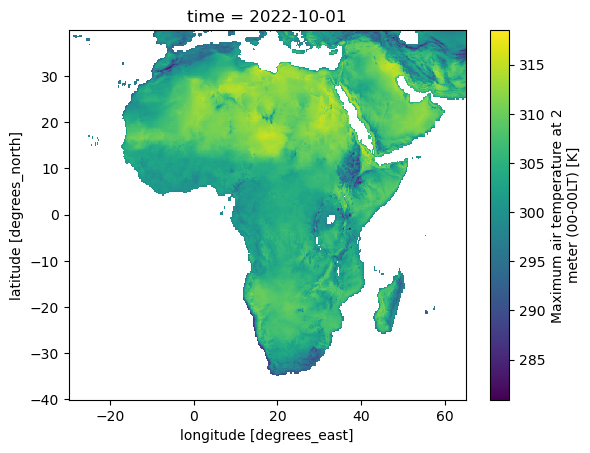

In [40]:
ds.Temperature_Air_2m_Max_24h[0].plot()